In [117]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [118]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [119]:
train.info()
# PassengerID : 탑승객 고유 아이디
# Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
# Pclass : 등실의 등급
# Name : 이름
# Sex : 성별
# Age : 나이
# Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
# Parch : 함께 탐승한 부모, 자식의 수
# Ticket :티켓 번호
# Fare : 티켓의 요금
# Cabin : 객실번호
# Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Surevived', 'Dead']
  df.plot(kind = 'bar', stacked = True, figsize = (5,3))

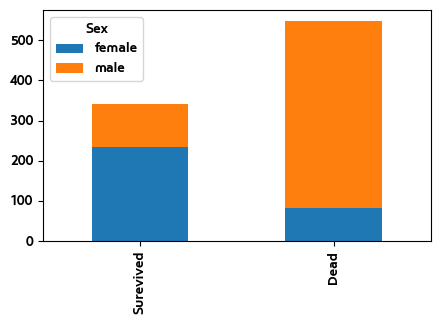

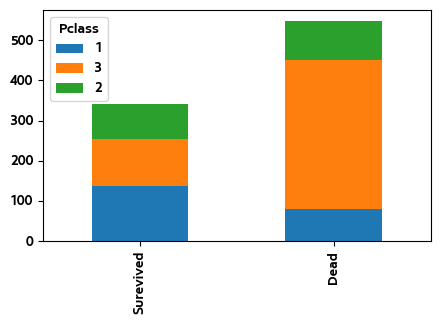

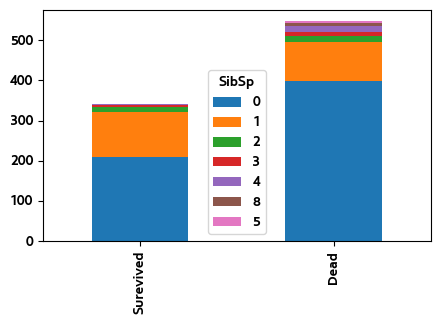

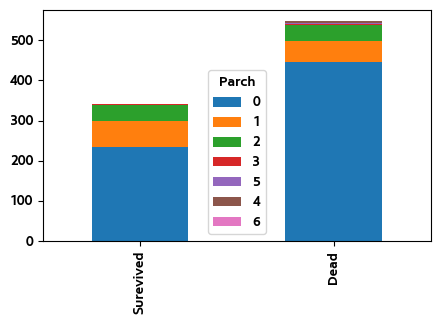

In [122]:
for f in ('Sex', 'Pclass', 'SibSp', 'Parch'): #'Age' ??
    bar_chart(f)    

In [123]:
import seaborn as sns

In [124]:
import matplotlib.font_manager as fm
# 나눔글꼴 경로 설정
font_path = 'C:/Windows/Fonts/현대하모니+L.ttf'
# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()
# 폰트 설정
plt.rc('font', family=font_name)

Text(0, 0.5, '나이')

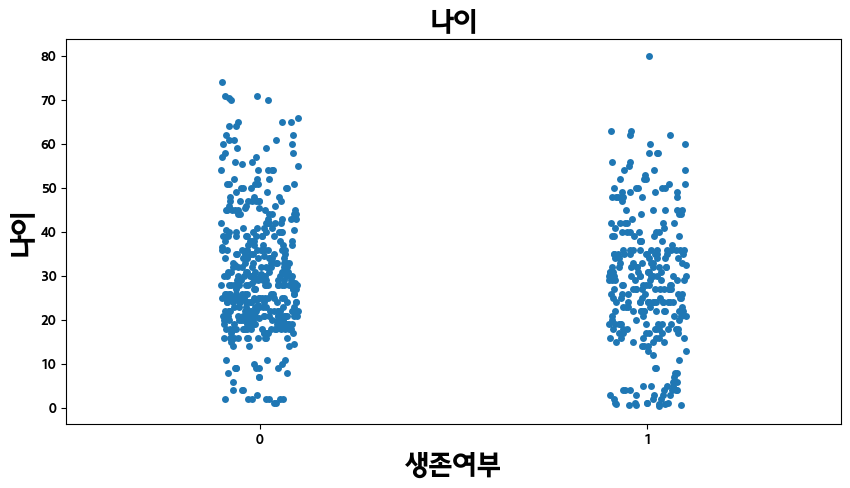

In [125]:
plt.figure(figsize = (10,5))
plt.title('나이',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Age', data = train, jitter = True)
plt.xlabel('생존여부', fontsize = 20)
plt.ylabel('나이', fontsize = 20)

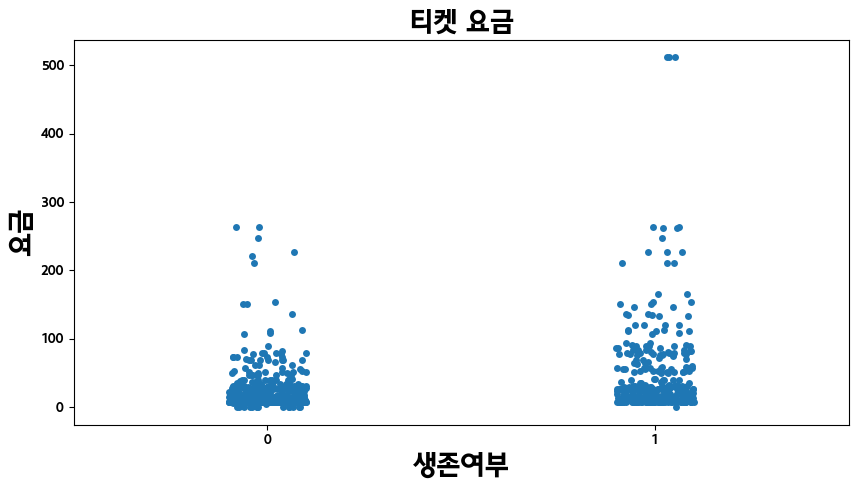

In [126]:
plt.figure(figsize = (10,5))
plt.title('티켓 요금',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Fare', data = train, jitter = True)
plt.xlabel('생존여부', fontsize = 20)
plt.ylabel('요금', fontsize = 20)
plt.show()
#0: 사망, 1: 생존

In [127]:
train.isnull().sum()
# 이상치 및 결측치 발생!!
# Age : 나이
# Cabin : 객실번호
# Embarked : 배에 탑승한 항구 이름

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
train['Age'].mean()
train.describe()
#Age의 count 값이 이상하다!? 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
train['Age'] = train['Age'].fillna(train['Age'].mean()) #최빈값
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})

In [130]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
test.describe()
#Age, Fare 결측치 발생
#성별에 대한 값을 문자열에서 -> 숫자형으로 변경

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [133]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})
#토론 : Fare 에서 test셋과 train 셋의 평균값 중에 어떤평균을 대입하는것이 맞을까?

In [134]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [135]:
# train = train.drop(['Name', 'Ticket'], axis = 1)
# test = test.drop(['Name', 'Ticket'], axis = 1)

In [136]:
# 훈련세트, 테스트세트 생성
train_x = train[['Pclass', 'SibSp','Age', 'Sex', 'Fare']]
train_y = train['Survived']

test_x = test[['Pclass', 'SibSp', 'Age', 'Sex', 'Fare']]

In [137]:
# 훈련세트, 테스트 세트 확인
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   SibSp   891 non-null    int64  
 2   Age     891 non-null    float64
 3   Sex     891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [165]:
train, test = train_test_split(train, test_size=0.3, random_state=123, stratify=train['Survived'])
train.head()
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
178,179,0,2,"Hale, Mr. Reginald",0,30.000000,0,0,250653,13.0000,NaN,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",1,29.699118,1,0,17464,51.8625,D21,S
16,17,0,3,"Rice, Master. Eugene",0,2.000000,4,1,382652,29.1250,NaN,Q
95,96,0,3,"Shorney, Mr. Charles Joseph",0,29.699118,0,0,374910,8.0500,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",0,21.000000,2,0,S.O.C. 14879,73.5000,NaN,S


In [167]:
# 독립변수(Feature)
X_train = train[train.columns[1:]]

# 종속변수(Target): Survived(1 or 0)
y_train = train[train.columns[:1]]

X_train.head()
y_train.head()

,PassengerId
199,200
468,469
198,199
574,575
776,777


In [160]:
from tensorflow.keras.layers import Dense, InputSpec, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [161]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [139]:
# 이미 구현된 인공지능 분류 모델, 학습 기법들
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [140]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state, learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [143]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X=train_x, y=train_y, scoring='accuracy', cv=kfold, n_jobs=1))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans": cv_means, "CrossValerrors": cv_std, "Algorithm": ["SVC", "DecisionTree", "AdaBoost",
                                                                                          "RandomForest", "ExtraTrees", "GradientBoosting", "MultipleLayerPerceptron", "KNeighboors", "LogisticRegression", "LinearDiscriminantAnalysis"]})

In [145]:
# cv_std로부터 각 막대의 오류 범위 계산
errors = [[v, v] for v in cv_std]
# 오류 범위 배열을 numpy 배열로 변환
errors = np.array(errors).T

Text(0.5, 1.0, 'Cross validation scores')

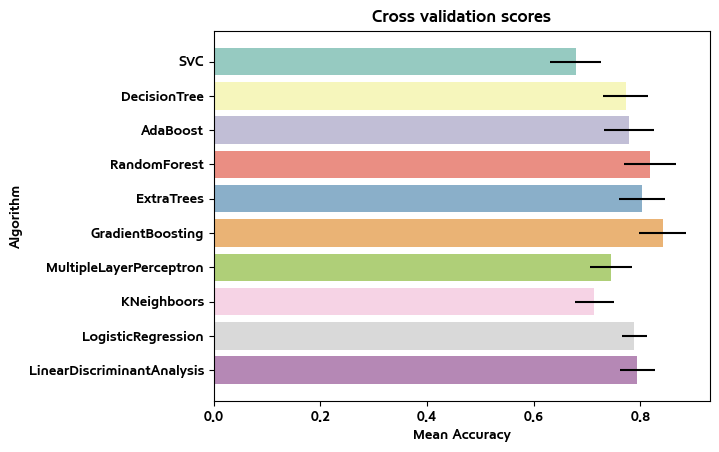

In [146]:
# 수정된 소스코드
g = sns.barplot(data=cv_res, x='CrossValMeans', y='Algorithm', palette="Set3", orient='h')
g.errorbar(x=cv_res['CrossValMeans'], y=cv_res['Algorithm'], xerr=errors, fmt='none', c='black')
g.set_xlabel("Mean Accuracy")
g.set_title("Cross validation scores")

In [157]:
model = GradientBoostingClassifier(random_state=random_state)

In [158]:
plot_model(model)

AttributeError: 'GradientBoostingClassifier' object has no attribute 'built'